In [2]:
from func_search import *
from func_def_class import *
from func_taux_transm import *
from func_res import *


import os
from path import Path
import csv
#import matplotlib.pyplot as plt 
import ConfigParser
from struct import unpack
import re

In [3]:
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
import ast

In [15]:
line = """
2017-03-30 16:07:22,035 [ParserPrintf:INFO] (asn=5115) from b376:SIXTOP:LinkReq rcvd - 
LinkRep prepared: from a772, bw=1, track=3, owner=a772, via track=0, owner=0000, queuePos=1, 
slot 35, ch 15, code 6
"""

asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
src2 = line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))]


print src

b376


In [4]:
df_res = pd.read_csv(r'data_csv/res.csv', dtype=str)
df_res

asn succes numAttempts simult_req simult_rep  \
0         [1221, 1339, 1562]      1           1        NaN        NaN   
1         [1221, 1299, 1583]      1           1        NaN        NaN   
2               [1221, 2407]      0           1        NaN        NaN   
3         [1627, 1664, 1705]      1           1        NaN        NaN   
4         [1830, 1867, 2233]      1           1        NaN        NaN   
5         [2236, 2577, 2780]      1           1        NaN        NaN   
6               [2439, 4116]      0           2        NaN        NaN   
7               [2845, 5002]      0           1        NaN        NaN   
8         [3048, 3138, 3341]      1           1        NaN        NaN   
9         [3251, 3938, 4141]      1           1        NaN        NaN   
10                    [4266]      0           1        NaN        NaN   
11        [4266, 5115, 5399]      1           1        NaN        NaN   
12        [5078, 6231, 8464]      1           2        NaN        NaN   
13        [5484, 5539, 5742]      1           1        NaN        NaN   
14        [5890, 6130, 6171]      1           1        NaN        NaN   
15              [6296, 8096]      0           1        NaN        NaN   
16        [6296, 6388, 6794]      1           1        NaN        NaN   
17                    [6905]      0           1        NaN        NaN   
18        [8123, 8368, 8977]      1           2        NaN        NaN   
19        [8529, 9276, 9479]      1           1        NaN        NaN   
20        [9138, 9180, 9789]      1           1        NaN        NaN   
21       [9341, 9586, 10577]      0           1        NaN        NaN   
22        [9544, 9682, 9885]      1           1        NaN        NaN   
23             [9950, 12098]      0           1        NaN        NaN   
24             [9950, 11194]      0           2        NaN        NaN   
25      [9950, 10088, 10291]      1           1        NaN        NaN   
26     [10356, 11103, 11306]      1           1        NaN        NaN   
27     [11371, 11509, 12118]      1           1        NaN        NaN   
28            [12589, 12657]      0           1        NaN        NaN   
29     [12792, 13195, 13398]      1           2        NaN        NaN   
..                       ...    ...         ...        ...        ...   
67          [242588, 243943]      0           1        NaN        NaN   
68  [244009, 246137, 246340]      1           2        NaN        NaN   
69          [246242, 246545]      0           1        NaN        NaN   
70          [246445, 248246]      0           2        NaN        NaN   
71          [246648, 250089]      0           3        NaN        NaN   
72          [248272, 252035]      0           4        NaN        NaN   
73          [250099, 254052]      0           5        NaN        NaN   
74  [252129, 254054, 255475]      1           6        NaN        NaN   
75          [254159, 256852]      0           1        NaN        NaN   
76                  [255580]      0           2        NaN        NaN   
77                  [257001]      0           3        NaN        NaN   
78          [258625, 260088]      0           1        NaN        NaN   
79  [260249, 260697, 261306]      1           2        NaN        NaN   
80  [261467, 261712, 264148]      1           1        NaN        NaN   
81  [263294, 263336, 264149]      0           1        NaN        NaN   
82  [264309, 264351, 264757]      0           2        NaN        NaN   
83  [367230, 367328, 369765]      0           4        NaN        NaN   
84  [369463, 369505, 369708]      1           3        NaN        NaN   
85  [369869, 369911, 370520]      1           1        NaN        NaN   
86          [382455, 384224]      0           1        NaN        NaN   
87  [385297, 385801, 388238]      0           2        NaN        NaN   
88          [387327, 389204]      0           3        NaN        NaN   
89  [389357, 391282, 393719]      0           4        NaN        NaN   
90  [39260

In [5]:
df_tx = pd.read_csv(r'data_csv/pkt_tx.csv', dtype=str)
df_tx["asn"] = df_tx["asn"].astype(int)
df_tx["numTxAttempts"] = df_tx["numTxAttempts"].astype(int)
df_tx

time  addr comp     asn statType trackinstance  \
0      2017-04-07 09:30:58,882  b868   22     730        3             0   
1      2017-04-07 09:31:07,538  b868   12    1015        3             0   
2      2017-04-07 09:31:09,884  b868   22    1096        3             0   
3      2017-04-07 09:31:14,754  8772   15    1258        3             0   
4      2017-04-07 09:31:14,754  b381   15    1258        3             0   
5      2017-04-07 09:31:14,755  1162   12    1258        3             0   
6      2017-04-07 09:31:15,477  1162   15    1282        3             0   
7      2017-04-07 09:31:15,990  b381   15    1299        3             0   
8      2017-04-07 09:31:17,191  8772   15    1339        3             0   
9      2017-04-07 09:31:18,453  b381   22    1380        3             0   
10     2017-04-07 09:31:18,782  1162   22    1392        3             0   
11     2017-04-07 09:31:20,800  8772   12    1459        3             0   
12     2017-04-07 09:31:20,856  1162   15    1461        3             0   
13     2017-04-07 09:31:20,858  b381   12    1461        3             0   
14     2017-04-07 09:31:22,090  8772   22    1502        3             0   
15     2017-04-07 09:31:23,292  b868   15    1542        3             0   
16     2017-04-07 09:31:23,891  b868   15    1562        3             4   
17     2017-04-07 09:31:24,525  b868   15    1583        3             0   
18     2017-04-07 09:31:25,846  b868   22    1624        3             0   
19     2017-04-07 09:31:26,959  c280   15    1664        3             0   
20     2017-04-07 09:31:28,191  8772   15    1705        3             0   
21     2017-04-07 09:31:28,197  b381   22    1705        3             0   
22     2017-04-07 09:31:28,430  1162   22    1713        3             0   
23     2017-04-07 09:31:29,397  c280   22    1745        3             0   
24     2017-04-07 09:31:31,950  8772   22    1827        3             0   
25     2017-04-07 09:31:33,059  1162   15    1867        3             0   
26     2017-04-07 09:31:33,060  b868   22    1867        3             0   
27     2017-04-07 09:31:33,061  c280   15    1867        3             0   
28     2017-04-07 09:31:36,730  b381   22    1989        3             0   
29     2017-04-07 09:31:39,172  b868   12    2070        3             0   
...                        ...   ...  ...     ...      ...           ...   
11503  2017-04-07 12:49:35,242  8772   18  397173        3             3   
11504  2017-04-07 12:49:36,956  c280   22  397230        3             0   
11505  2017-04-07 12:49:41,824  b381   22  397392        3             0   
11506  2017-04-07 12:49:42,429  8772   22  397412        3             4   
11507  2017-04-07 12:49:43,421  8772   27  397445        3             3   
11508  2017-04-07 12:49:44,386  b381   12  397474        3             0   
11509  2017-04-07 12:49:44,389  1162   12  397474        3             0   
11510  2017-04-07 12:49:44,413  8772   22  397474        3             0   
11511  2017-04-07 12:49:44,684  b381   27  397487        3             3   
11512  2017-04-07 12:49:45,493  1162   22  397514        3             0   
11513  2017-04-07 12:49:46,724  c280   22  397555        3             0   
11514  2017-04-07 12:49:50,481  b868   12  397677        3             0   
11515  2017-04-07 12:49:51,592  c280   12  397717        3             0   
11516  2017-04-07 12:49:51,593  b381   22  397717        3             0   
11517  2017-04-07 12:49:51,595  b868    0  397717        3             0   
11518  2017-04-07 12:49:52,255  1162   27  397739        3             3   
11519  2017-04-07 12:49:52,825  8772   12  397758        3             0   
11520  2017-04-07 12:49:53,188  c280   27  397770        3             3   
11521  2017-04-07 12:49:53,550  8772   18  397782        3             3   
11522  2017-04-07 12:49:54,028  1162   22  397798        3             0   
11523  2017-04-07 12:49:55,266  8772   22  397839        3             0  

In [14]:
# pour transformer un str en liste
#ast.literal_eval(df_res.loc[i]["asn"])

In [6]:
#fonction get simult df | entrée un df res tmp et df tx, en sortie une liste des simult
def get_simult_df(df_tmp, df_tx):
    liste_tmp = []
    del liste_tmp[:]
    i=0
    numAtt = 0
    simult = 0
    asn_tmp=0
    
    #si la liste tmp est vide, on retourne une liste vide. (ne devrait pas arriver)
    if df_tmp.empty:
        return liste_tmp
    #    liste_tmp.append(len(  df_tx.loc[ (df_tx['asn']==  df_tmp.iloc[-1]["asn"] )]  ))
    numAtt = df_tmp.iloc[-1]["numTxAttempts"]
    #SI il y a un mismatch dans les res -> par exemple que un pkt avec numAtt = 2/3/4 mais pas les precedent, on ne reonte pas
    if len(df_tmp) >= numAtt:
        for i in range(numAtt):
            asn_tmp = df_tmp.loc[  df_tx['numTxAttempts'] == numAtt-i   ]["asn"].iloc[-1]
            simult = len( df_tx.loc[ (df_tx['asn']==  asn_tmp )] )
            liste_tmp.append( simult )
    else:
        asn_tmp = df_tmp.loc[  df_tx['numTxAttempts'] == numAtt   ]["asn"].iloc[-1]
        simult = len( df_tx.loc[ (df_tx['asn']==  asn_tmp )] )
        liste_tmp.append( simult )
    liste_tmp.reverse()
    return liste_tmp


In [11]:
# si la res a marcher (etat == 4) -> les tx de paquets sont entre :
# linkreq - asn[0] et asn[1]
#linkrep - asn[1] et asn[2]

#simult est une liste qui prend comme elemts : [A,B] | A=liste:nb de tx simult lors de l'envois du linkreq
#B=liste:nb de tx simult pour linkrep
simult = []
A=[]
B=[]

#data frame tmp 
df_tmp = pd.DataFrame

#pour A
i=0
for i in range(len(df_res)):
    if (df_res.loc[i]["state"] == "4") or (df_res.loc[i]["state"] == "-1") or (df_res.loc[i]["state"] == "-2"):
        df_tmp = df_tx.loc[ (df_tx['asn']<=ast.literal_eval(df_res.loc[i]["asn"])[1]) & 
                            (df_tx['asn']>=ast.literal_eval(df_res.loc[i]["asn"])[0]) &
                            (df_tx['addr']==df_res.loc[i]["src"]) &
                            (df_tx['l2Dest'].str.endswith(df_res.loc[i]["dest"])) &
                            (df_tx['frameType']=="IEEE154_TYPE_DATA") &
                            ((df_tx['trackinstance']=="4") | (df_tx['trackinstance']=="0") )]
        
        A = get_simult_df(df_tmp, df_tx)
        df_res.set_value(i,"simult_req", A)
    elif df_res.loc[i]["state"] == "-3":
        # pas assez d'info
        pass

#pour B
i=0
for i in range(len(df_res)):
    if (df_res.loc[i]["state"] == "4") or (df_res.loc[i]["state"] == "-2"):
        df_tmp = df_tx.loc[ (df_tx['asn']<=ast.literal_eval(df_res.loc[i]["asn"])[2]) & 
                            (df_tx['asn']>=ast.literal_eval(df_res.loc[i]["asn"])[1]) &
                            (df_tx['addr']==df_res.loc[i]["src"]) &
                            (df_tx['l2Dest'].str.endswith(df_res.loc[i]["dest"])) &
                            (df_tx['frameType']=="IEEE154_TYPE_DATA") &
                            ((df_tx['trackinstance']=="4") | (df_tx['trackinstance']=="0") )]
        
        B = get_simult_df(df_tmp, df_tx)
        df_res.set_value(i,"simult_rep", B)
    elif df_res.loc[i]["state"] == "-3":
        # pas assez d'info
        pass
        
    


In [50]:
i = 15

df_tmp = df_tx.loc[ (df_tx['asn']<=ast.literal_eval(df_res.loc[i]["asn"])[1]) &
                            (df_tx['asn']>=ast.literal_eval(df_res.loc[i]["asn"])[0]) &
                            (df_tx['addr']==df_res.loc[i]["src"]) &
                            (df_tx['l2Dest'].str.endswith(df_res.loc[i]["dest"])) &
                            (df_tx['frameType']=="IEEE154_TYPE_DATA") &
                            ((df_tx['trackinstance']=="4") | (df_tx['trackinstance']=="0") )]
        
        
df_tmp

Empty DataFrame
Columns: [time, addr, comp, asn, statType, trackinstance, trackowner, length, frameType, slotOffset, frequency, l2Dest, txpower, numTxAttempts, queuePos, succes_rx, succes_ack, list_rx]
Index: []

In [58]:
# TEST POUR LA FONCTION GET SIMULT
if 1==1:
    liste_tmp = []
    del liste_tmp[:]
    i=0
    numAtt = 0
    simult = 0
    asn_tmp=0
    
    #si la liste tmp est vide, on retourne une liste vide. (ne devrait pas arriver)
    if df_tmp.empty:
        return liste_tmp
    
    #    liste_tmp.append(len(  df_tx.loc[ (df_tx['asn']==  df_tmp.iloc[-1]["asn"] )]  ))
    numAtt = df_tmp.iloc[-1]["numTxAttempts"]
    #SI il y a un mismatch dans les res -> par exemple que un pkt avec numAtt = 2/3/4 mais pas les precedent, on ne reonte pas
    if len(df_tmp) >= numAtt:
        for i in range(numAtt):
            asn_tmp = df_tmp.loc[  df_tx['numTxAttempts'] == numAtt-i   ]["asn"].iloc[-1]
            simult = len( df_tx.loc[ (df_tx['asn']==  asn_tmp )] )
            liste_tmp.append( simult )
    else:
        asn_tmp = df_tmp.loc[  df_tx['numTxAttempts'] == numAtt   ]["asn"].iloc[-1]
        simult = len( df_tx.loc[ (df_tx['asn']==  asn_tmp )] )
        liste_tmp.append( simult )

liste_tmp.reverse()
liste_tmp

SyntaxError: 'return' outside function (<ipython-input-58-2fc254fa303f>, line 12)

In [51]:
df_res.loc[ (df_res['state'] == "-1" )]

asn succes numAttempts    simult_req simult_rep  queuePos  \
2       [1221, 2407]      0           1  [1, 2, 3, 1]        NaN    [0, 0]   
6       [2439, 4116]      0           2     [1, 1, 1]        NaN    [0, 0]   
7       [2845, 5002]      0           1        [1, 1]        NaN    [1, 1]   
15      [6296, 8096]      0           1           NaN        NaN    [0, 0]   
23     [9950, 12098]      0           1           NaN        NaN    [5, 5]   
24     [9950, 11194]      0           2           NaN        NaN    [3, 3]   
28    [12589, 12657]      0           1           NaN        NaN    [5, 5]   
36    [16649, 18738]      0           1           NaN        NaN    [4, 4]   
42  [208078, 208973]      0           3           NaN        NaN    [3, 3]   
45  [212958, 215139]      0           1           NaN        NaN    [0, 0]   
46  [214980, 215109]      0           1           NaN        NaN    [3, 3]   
48  [215191, 216456]      0           2           NaN        NaN    [0, 0]   
49  [217010, 217148]      0           1           NaN        NaN    [9, 9]   
56  [228581, 230462]      0           2           NaN        NaN    [5, 5]   
57  [230611, 230658]      0           3           NaN        NaN    [5, 5]   
61  [235077, 236740]      0           2           NaN        NaN    [7, 7]   
62  [236904, 236991]      0           3           NaN        NaN    [7, 7]   
67  [242588, 243943]      0           1           NaN        NaN    [1, 1]   
69  [246242, 246545]      0           1           NaN        NaN    [1, 1]   
70  [246445, 248246]      0           2           NaN        NaN    [2, 1]   
71  [246648, 250089]      0           3           NaN        NaN    [1, 1]   
72  [248272, 252035]      0           4           NaN        NaN    [1, 1]   
73  [250099, 254052]      0           5           NaN        NaN    [1, 1]   
75  [254159, 256852]      0           1           NaN        NaN    [1, 1]   
78  [258625, 260088]      0           1           NaN        NaN  [10, 11]   
86  [382455, 384224]      0           1           NaN        NaN    [1, 1]   
88  [387327, 389204]      0           3           NaN        NaN    [8, 1]   
91  [392816, 394846]      0           1           NaN        NaN    [3, 3]   
93  [395049, 396662]      0           2           NaN        NaN    [1, 1]   

   slot  ch   src  dest owner state info  
2    -1  -1  1162  b868  b868    -1  NaN  
6    -1  -1  1162  b868  b868    -1  NaN  
7    -1  -1  8772  b868  8772    -1  NaN  
15   -1  -1  c280  8772  c280    -1  NaN  
23   -1  -1  1162  8772  b868    -1  NaN  
24   -1  -1  c280  8772  c280    -1  NaN  
28   -1  -1  1162  8772  b868    -1  NaN  
36   -1  -1  1162  8772  1162    -1  NaN  
42   -1  -1  c280  b868  c280    -1  NaN  
45   -1  -1  b868  c280  8772    -1  NaN  
46   -1  -1  c280  8772  c280    -1  NaN  
48   -1  -1  b868  c280  8772    -1  NaN  
49   -1  -1  c280  8772  c280    -1  NaN  
56   -1  -1  c280  b868  c280    -1  NaN  
57   -1  -1  c280  b868  c280    -1  NaN  
61   -1  -1  c280  8772  c280    -1  NaN  
62   -1  -1  c280  8772  c280    -1  NaN  
67   -1  -1  c280  b868  c280    -1  NaN  
69   -1  -1  c280  b868  c280    -1  NaN  
70   -1  -1  c280  b868  c280    -1  NaN  
71   -1  -1  c280  b868  c280    -1  NaN  
72   -1  -1  c280  b868  c280    -1  NaN  
73   -1  -1  c280  b868  c280    -1  NaN  
75   -1  -1  c280  b868  c280    -1  NaN  
78   -1  -1  c280  8772  c280    -1  NaN  
86   -1  -1  c280  b868  c280    -1  NaN  
88   -1  -1  c280  b868  c280    -1  NaN  
91   -1  -1  b868  c280  8772    -1  NaN  
93   -1  -1  b868  c280  8772    -1  NaN

In [57]:
print df_tmp.empty

True


In [82]:
df_res.loc[0]['simult_req']   


[3, 1]

In [80]:
type( df_res.loc[0]['simult_req'])

list

In [67]:
i=0
df_res.loc[i]["state"] == "2" or "4"

False

In [12]:
df_res

asn succes numAttempts    simult_req simult_rep  \
0         [1221, 1339, 1562]      1           1        [3, 1]        [1]   
1         [1221, 1299, 1583]      1           1        [3, 1]        [1]   
2               [1221, 2407]      0           1  [1, 2, 3, 1]        NaN   
3         [1627, 1664, 1705]      1           1           [1]        [1]   
4         [1830, 1867, 2233]      1           1           [3]        [3]   
5         [2236, 2577, 2780]      1           1           [1]        [1]   
6               [2439, 4116]      0           2     [1, 1, 1]        NaN   
7               [2845, 5002]      0           1        [1, 1]        NaN   
8         [3048, 3138, 3341]      1           1           [1]        [1]   
9         [3251, 3938, 4141]      1           1  [1, 1, 1, 1]        [1]   
10                    [4266]      0           1           NaN        NaN   
11        [4266, 5115, 5399]      1           1     [1, 2, 1]        [1]   
12        [5078, 6231, 8464]      1           2           [1]        [1]   
13        [5484, 5539, 5742]      1           1           [1]        [1]   
14        [5890, 6130, 6171]      1           1        [3, 1]        [1]   
15              [6296, 8096]      0           1            []        NaN   
16        [6296, 6388, 6794]      1           1           [1]     [1, 2]   
17                    [6905]      0           1           NaN        NaN   
18        [8123, 8368, 8977]      1           2           [1]        [1]   
19        [8529, 9276, 9479]      1           1           [1]        [1]   
20        [9138, 9180, 9789]      1           1           [1]        [1]   
21       [9341, 9586, 10577]      0           1           [1]        [2]   
22        [9544, 9682, 9885]      1           1           [1]        [1]   
23             [9950, 12098]      0           1        [2, 1]        NaN   
24             [9950, 11194]      0           2           [2]        NaN   
25      [9950, 10088, 10291]      1           1           [1]        [1]   
26     [10356, 11103, 11306]      1           1           [1]        [1]   
27     [11371, 11509, 12118]      1           1           [1]        [2]   
28            [12589, 12657]      0           1            []        NaN   
29     [12792, 13195, 13398]      1           2  [2, 2, 1, 1]        [1]   
..                       ...    ...         ...           ...        ...   
67          [242588, 243943]      0           1        [1, 1]        NaN   
68  [244009, 246137, 246340]      1           2           [1]        [1]   
69          [246242, 246545]      0           1            []        NaN   
70          [246445, 248246]      0           2        [1, 1]        NaN   
71          [246648, 250089]      0           3        [1, 1]        NaN   
72          [248272, 252035]      0           4  [1, 1, 2, 1]        NaN   
73          [250099, 254052]      0           5  [1, 1, 1, 1]        NaN   
74  [252129, 254054, 255475]      1           6        [1, 1]  [2, 1, 1]   
75          [254159, 256852]      0           1     [2, 1, 1]        NaN   
76                  [255580]      0           2           NaN        NaN   
77                  [257001]      0           3           NaN        NaN   
78          [258625, 260088]      0           1           [1]        NaN   
79  [260249, 260697, 261306]      1           2           [1]     [1, 2]   
80  [261467, 261712, 264148]      1           1           [1]        [1]   
81  [263294, 263336, 264149]      0           1           [1]        [1]   
82  [264309, 264351, 264757]      0           2           [1]     [2, 2]   
83  [367230, 367328, 369765]      0           4           [1]        [1]   
84  [369463, 369505, 369708]      1           3           [1]        [1]   
85  [369869, 369911, 370520]      1           1           [1]        [1]   
86          [382455, 384224]      0           1           [2]        NaN   
87  [385297, 385801, 388238]      0           2        [1, 1]        [1] 

In [23]:
df_res.loc[ (df_res['src'] == 'c280') &
                     (df_res['dest'] == "b868") ]


asn succes numAttempts    simult_req simult_rep  \
9         [3251, 3938, 4141]      1           1  [1, 1, 1, 1]        NaN   
10                    [4266]      0           1           NaN        NaN   
37                   [65775]      0           1           NaN        NaN   
41  [206657, 206755, 209192]      0           2           [1]        NaN   
42          [208078, 208973]      0           3  [1, 1, 1, 1]        NaN   
43  [210108, 210409, 212846]      0           3        [1, 1]        NaN   
44  [211935, 212844, 215281]      0           4           [1]        NaN   
55  [227160, 227258, 229695]      0           1           [1]        NaN   
56          [228581, 230462]      0           2            []        NaN   
57          [230611, 230658]      0           3            []        NaN   
58  [230814, 230912, 233349]      0           4           [1]        NaN   
59  [233047, 233145, 235582]      0           5           [1]        NaN   
67          [242588, 243943]      0           1        [1, 1]        NaN   
68  [244009, 246137, 246340]      1           2           [1]        NaN   
69          [246242, 246545]      0           1            []        NaN   
70          [246445, 248246]      0           2        [1, 1]        NaN   
71          [246648, 250089]      0           3        [1, 1]        NaN   
72          [248272, 252035]      0           4  [1, 1, 2, 1]        NaN   
73          [250099, 254052]      0           5  [1, 1, 1, 1]        NaN   
74  [252129, 254054, 255475]      1           6        [1, 1]        NaN   
75          [254159, 256852]      0           1     [2, 1, 1]        NaN   
76                  [255580]      0           2           NaN        NaN   
77                  [257001]      0           3           NaN        NaN   
83  [367230, 367328, 369765]      0           4           [1]        NaN   
86          [382455, 384224]      0           1           [2]        NaN   
87  [385297, 385801, 388238]      0           2        [1, 1]        NaN   
88          [387327, 389204]      0           3        [1, 1]        NaN   
89  [389357, 391282, 393719]      0           4        [1, 1]        NaN   
90  [392605, 392702, 394328]      0           5           [1]        NaN   

      queuePos slot  ch   src  dest owner state info  
9    [0, 2, 2]  101  14  c280  b868  b868     4  NaN  
10         [0]   -1  -1  c280  b868  c280    -3  NaN  
37         [1]   -1  -1  c280  b868  c280    -3  NaN  
41   [1, 1, 1]   13  13  c280  b868  c280    -2  NaN  
42      [3, 3]   -1  -1  c280  b868  c280    -1  NaN  
43   [2, 1, 1]  164   7  c280  b868  c280    -2  NaN  
44   [6, 3, 3]   22   8  c280  b868  c280    -2  NaN  
55   [1, 3, 3]  103   1  c280  b868  c280    -2  NaN  
56      [5, 5]   -1  -1  c280  b868  c280    -1  NaN  
57      [5, 5]   -1  -1  c280  b868  c280    -1  NaN  
58   [2, 1, 1]   60   9  c280  b868  c280    -2  NaN  
59   [7, 4, 4]  114   9  c280  b868  c280    -2  NaN  
67      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
68   [3, 3, 3]  197  12  c280  b868  c280     4  NaN  
69      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
70      [2, 1]   -1  -1  c280  b868  c280    -1  NaN  
71      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
72      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
73      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
74   [1, 1, 1]   85   6  c280  b868  c280     4  NaN  
75      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
76        [11]   -1  -1  c280  b868  c280    -3  NaN  
77        [10]   -1  -1  c280  b868  c280    -3  NaN  
83   [1, 1, 1]  199  14  c280  b868  c280    -2  NaN  
86      [1, 1]   -1  -1  c280  b868  c280    -1  NaN  
87   [1, 1, 1]   18  14  c280  b868  c280    -2  NaN  
88      [8, 1]   -1  -1  c280  b868  c280    -1  NaN  
89  [10, 2, 2]   21  11  c280  b868  c280    -2  NaN  
90   [2, 4, 1]   13   3  c280  b868  c280    -2  NaN

In [22]:
df_res.loc[ (df_res['asn'] == 4266) ]

Empty DataFrame
Columns: [asn, succes, numAttempts, simult_req, simult_rep, queuePos, slot, ch, src, dest, owner, state, info]
Index: []

In [15]:
### FONCTION POUR CALCULER LES EVOIS SIMULT D'une Tx
## PREND EN ENTREE UNE RES (ASN/DEST/SRC)  
## sort une liste des simult lors des envois -> regarde pour un linkreq/rep txed cb d'autre paquets sont transmis sur le meme slot

# valeurs d'entrées (en parametre)
asn = list_res[0].asn[0]
dest = list_res[0].dest
src = list_res[0].src

#asn tmp pour prendre la valeur du dernier essai de transmission
asn_tmp = asn

#list_asn_tx liste qui prend les asn des transmissions
list_asn_tx = []
del list_asn_tx[:]

### la premiere boucle permet de voir les asn des transmissions.

with open("data/parsed/event/data_STAT_PK_TX.log") as origin_file:
    for line in origin_file:
        #on verifie que l'asn de la ligne est dans l'intervalle asn_enqueued + fenetre  |  dest et src correspondent
        if int(get_asn(line)) > asn_tmp and get_asn(line) <= asn_tmp+500 and get_dest(line)==dest and get_src(line)==src:
            list_asn_tx.append(int(get_asn(line)))
            
            #on verifie que le pkt est recu sinon on continu
            
            
            asn_tmp=int(get_asn(line))



#deuxieme boucle on regarde les simults
    
    
    
print type(asn)

<type 'int'>


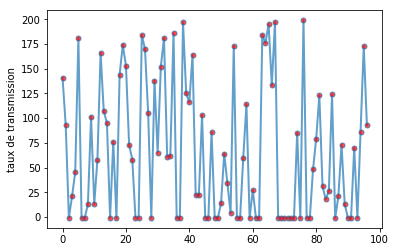

In [32]:
list_ch=[]
list_slot=[]

del list_ch[:]
del list_slot[:]

for el in list_res:
    list_ch.append(el.ch)
    list_slot.append(el.slot)

plt.plot(list_slot,'-o', ms=5, lw=2, alpha=0.7, mfc='red')
plt.ylabel('taux de transmission')
#plt.xlim((0,200))
#plt.savefig('plot_comp1.png')
plt.show()
    